In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("OnlineRetail.csv", encoding="ISO-8859-1")

# Display the first few rows of the dataset
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Drop rows with missing values
data.dropna(inplace=True)

# Drop duplicate rows
data.drop_duplicates(inplace=True)

# Display the shape of the cleaned dataset
print("\nShape of cleaned dataset:", data.shape)



Missing Values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Shape of cleaned dataset: (401604, 8)


In [11]:
# Drop rows with missing descriptions
data.dropna(subset=['Description'], inplace=True)

# Assign placeholder value 'Unknown' for missing CustomerID
data['CustomerID'].fillna('Unknown', inplace=True)

# Display the shape of the cleaned dataset after handling missing values
print("Shape of cleaned dataset after handling missing values:", data.shape)



Shape of cleaned dataset after handling missing values: (401604, 8)


In [13]:
# Step 3: Data Preprocessing

# Select relevant features
selected_features = ["StockCode", "Description", "Quantity", "UnitPrice", "CustomerID", "Country"]
preprocessed_data = data[selected_features].copy()

# Display more rows of the preprocessed data
print("\nPreprocessed Data:")
print(preprocessed_data)

# Provide summary statistics of numerical features
print("\nSummary Statistics:")
print(preprocessed_data.describe())

# Check for any remaining missing values after preprocessing
missing_values_after_preprocessing = preprocessed_data.isnull().sum()
print("\nMissing Values after Preprocessing:")
print(missing_values_after_preprocessing)





Preprocessed Data:
       StockCode                          Description  Quantity  UnitPrice  \
0         85123A   WHITE HANGING HEART T-LIGHT HOLDER         6       2.55   
1          71053                  WHITE METAL LANTERN         6       3.39   
2         84406B       CREAM CUPID HEARTS COAT HANGER         8       2.75   
3         84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39   
4         84029E       RED WOOLLY HOTTIE WHITE HEART.         6       3.39   
...          ...                                  ...       ...        ...   
541904     22613          PACK OF 20 SPACEBOY NAPKINS        12       0.85   
541905     22899         CHILDREN'S APRON DOLLY GIRL          6       2.10   
541906     23254        CHILDRENS CUTLERY DOLLY GIRL          4       4.15   
541907     23255      CHILDRENS CUTLERY CIRCUS PARADE         4       4.15   
541908     22138        BAKING SET 9 PIECE RETROSPOT          3       4.95   

        CustomerID         Country  
0     

C:\Users\Gabriel Anderson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel Anderson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


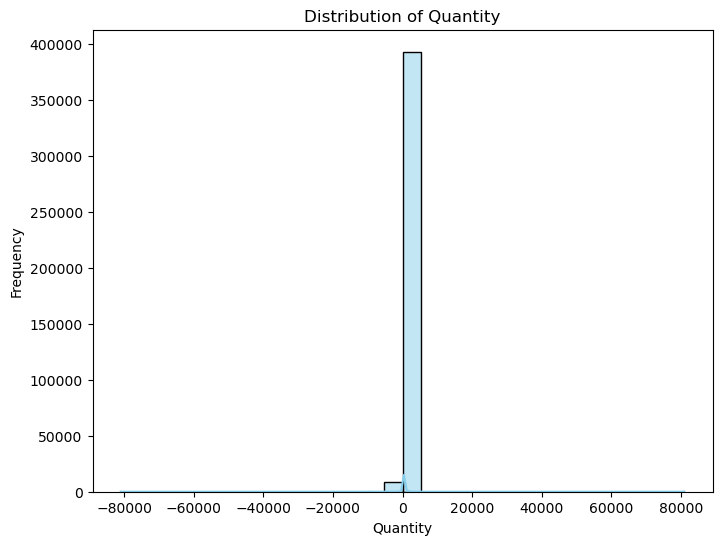

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize distribution of Quantity
plt.figure(figsize=(8, 6))
sns.histplot(preprocessed_data['Quantity'], bins=30, color='skyblue', kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()



C:\Users\Gabriel Anderson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel Anderson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


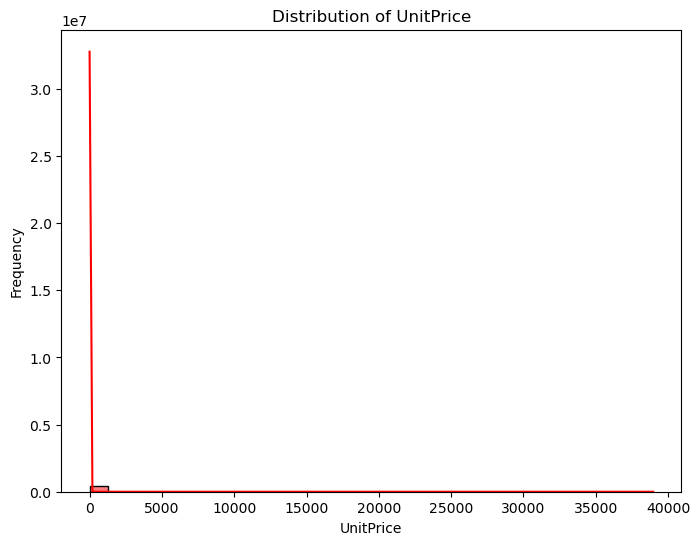

In [20]:
# Visualize distribution of UnitPrice
plt.figure(figsize=(8, 6))
sns.histplot(preprocessed_data['UnitPrice'], bins=30, color='red', kde=True)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()



C:\Users\Gabriel Anderson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Gabriel Anderson\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


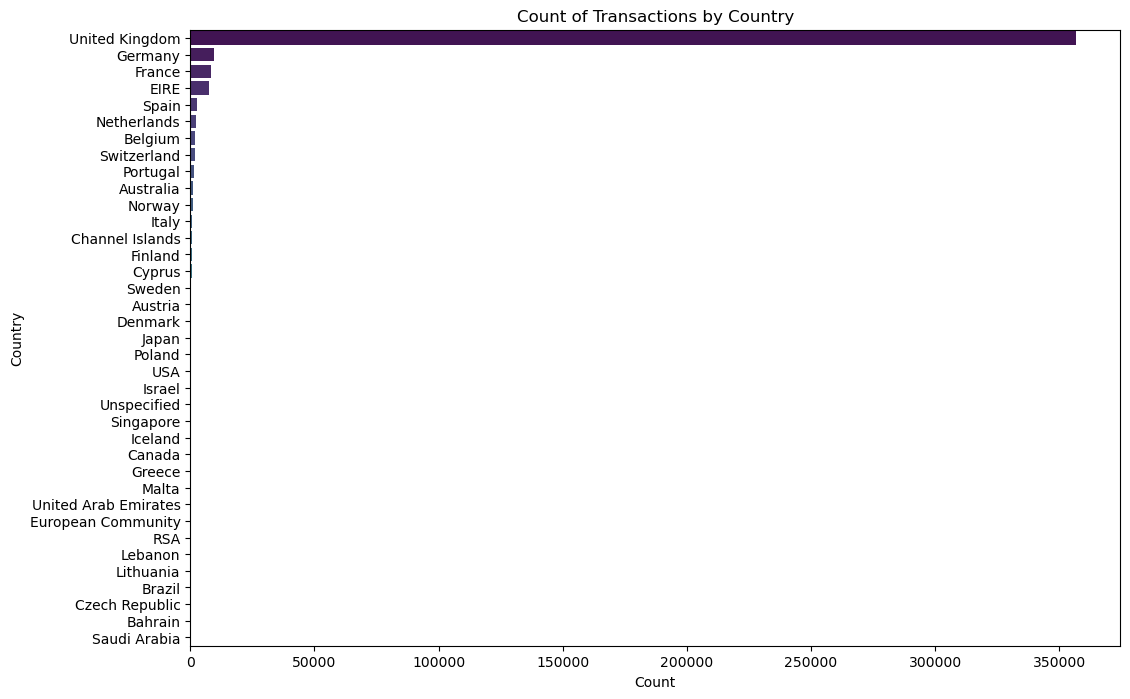

In [17]:
# Visualize count of transactions by Country
plt.figure(figsize=(12, 8))
sns.countplot(y='Country', data=preprocessed_data, order=preprocessed_data['Country'].value_counts().index, palette='viridis')
plt.title('Count of Transactions by Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()


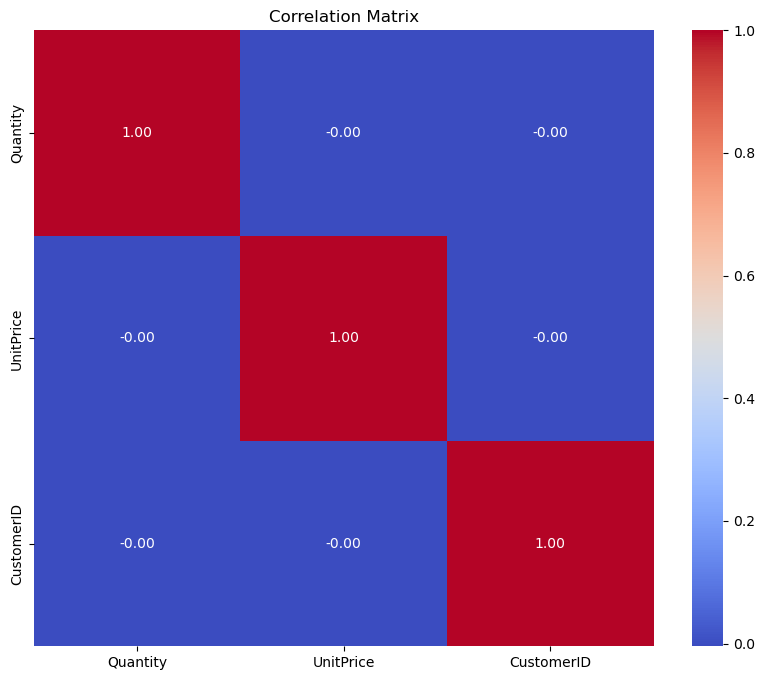

In [19]:
# Select only numeric columns for correlation matrix
numeric_columns = preprocessed_data.select_dtypes(include=['float64', 'int64'])

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
